In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import sys
import scipy
import pickle

In [2]:
# Read in Full Data Set that Jonathan created
stock_df = pd.read_csv('../../data/all_stocks.csv')

In [6]:
# Utility to convert dates to ints so that they can be compared
def date_to_int(date):
    year = date[0:4]
    month = date[5:7]
    day = date[8:10]
    return int(year+month+day)

In [40]:
np.shape(stock_df)

(2870, 4912)

In [4]:
# Load Jonathan's dict of stocks for each year
with open('../../data/valid_stocks_by_year.txt', 'rb') as f:
    valid_years= pickle.load(f)

In [87]:
valid_years[2006][0:10]

['A', 'AA', 'AAL', 'AAME', 'AAN', 'AAON', 'AAP', 'AAPL', 'AAU', 'AAV']

In [7]:
# Convert Date to int, and set this column as the index
stock_df['Date'] = stock_df['Date'].apply(date_to_int)
stock_df = stock_df.set_index('Date')

In [8]:
stock_df.head()

,A,AA,AAC,AAL,AAMC,AAME,AAN,AAOI,AAON,AAP,...,ZIXI,ZLTQ,ZN,ZNGA,ZNH,ZOES,ZTR,ZTS,ZUMZ,ZX
Date,,,,,,,,,,,,,,,,,,,,,
20050103,15.459416,25.595159,NaN,NaN,NaN,2.903700,14.214059,NaN,2.597803,27.796861,...,4.99,NaN,NaN,NaN,13.24,NaN,21.24,NaN,NaN,NaN
20050104,15.051570,25.132646,NaN,NaN,NaN,2.979366,13.567962,NaN,2.578764,27.611764,...,4.83,NaN,NaN,NaN,12.98,NaN,21.12,NaN,NaN,NaN
20050105,15.045100,24.983980,NaN,NaN,NaN,2.932075,13.710107,NaN,2.570107,27.662822,...,4.75,NaN,NaN,NaN,12.77,NaN,21.04,NaN,NaN,NaN
20050106,14.714933,25.091349,NaN,NaN,NaN,2.856408,13.567962,NaN,2.532028,27.637299,...,4.53,NaN,NaN,NaN,12.71,NaN,21.04,NaN,NaN,NaN
20050107,14.701983,25.347384,NaN,NaN,NaN,3.036116,13.005861,NaN,2.499154,27.477727,...,4.52,NaN,NaN,NaN,12.44,NaN,21.12,NaN,NaN,NaN


In [50]:
# Create random portfolio

# Pick stocks
sample_portfolio = np.random.choice(valid_years[2007],10)

# Take just the dates in 2007
portfolio_2007 = stock_df[sample_portfolio][np.logical_and(stock_df.index > 20061231, stock_df.index < 20080101)]

# Get rid of rows that have NaN's
portfolio_2007 = portfolio_2007.dropna()

In [9]:
sample = np.random.choice(valid_years[2006],10)

In [17]:
abc = stock_df[sample][np.logical_and(stock_df.index >20051231, stock_df.index < 20070101)].dropna()

In [20]:
# Index data
spy = pd.read_csv('../../data/spy.csv')
spy['Date'] = spy['Date'].apply(date_to_int)

# Reset index of the df, and take just the Close column
spy = spy.set_index('Date')['Close']
spy.head()

Date
20160222    1945.500000
20160219    1917.780029
20160218    1917.829956
20160217    1926.819946
20160216    1895.579956
Name: Close, dtype: float64

In [46]:
spy_2006= spy[np.logical_and(spy.index>20051231, spy.index<20070101)]

In [23]:
# Example of how simple it is to join data frames
abc.join(spy_2006).head()

,MFL,EQIX,SSFN,MLR,BECN,ITUB,VCO,TSEM,IX,ZBRA,Close
Date,,,,,,,,,,,
20060103,14.61,37.153142,9.073587,16.714900,19.113331,61.40,30.16,24.751238,132.00,42.830002,1268.800049
20060104,14.63,38.067847,9.073587,16.798894,19.333330,63.65,30.60,26.701336,133.25,42.410000,1273.459961
20060105,14.68,38.785261,9.232776,17.050877,19.313330,63.49,30.30,26.101306,132.30,42.529999,1273.479980
20060106,14.72,39.000487,9.232776,16.798894,19.486670,65.42,30.48,26.401320,136.00,44.119999,1285.449951
20060109,14.79,39.556483,9.232776,16.966884,20.313330,66.16,30.18,23.251163,137.70,44.790001,1290.150024


In [89]:
sys.path.append('../Friedman/')

In [101]:
from get_beta import get_beta

In [95]:
list(spy_2007.sort_index().diff())

[nan,
 1.7399900000000343,
 -8.6300049999999828,
 3.1300049999999828,
 -0.72998099999995247,
 2.7399909999999181,
 8.969970000000103,
 6.910033999999996,
 1.1700439999999617,
 -1.2800290000000132,
 -4.25,
 4.1300049999999828,
 -7.5500489999999445,
 5.0400389999999788,
 12.140014999999948,
 -16.229980999999952,
 -1.719970000000103,
 -1.5600589999999102,
 8.1999510000000555,
 9.4200439999999617,
 7.6999510000000555,
 2.4500739999998586,
 -1.4000249999999141,
 1.0100099999999657,
 2.0200199999999313,
 -1.7099610000000212,
 -10.25,
 -4.690063999999893,
 10.890014999999948,
 11.040038999999979,
 1.5100099999999657,
 -1.2700199999999313,
 4.1400149999999485,
 -2.0500489999999445,
 -1.25,
 -5.190063999999893,
 -1.8199460000000727,
 -50.329956000000038,
 7.7799070000000938,
 -3.649902000000111,
 -16.0,
 -13.050048999999944,
 21.290038999999979,
 -3.4400630000000092,
 9.9200439999999617,
 0.9499510000000555,
 3.7600099999999657,
 -28.650024999999914,
 9.2200929999999062,
 5.1099850000000515,
 -

In [133]:
alpha, beta = get_beta(portfolio_2007['ROVI'].diff(),spy_2007.sort_index().diff())

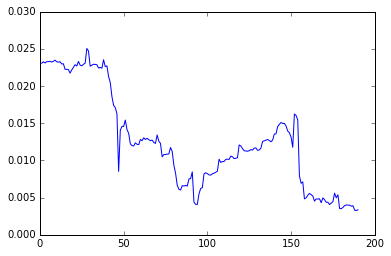

In [134]:
plt.plot(beta)

In [136]:
portfolio_2007.head()

,QCOM,SIGM,XRA,GOOG,ROVI,OXGN,DSX,CNC,MLAB,CTBI
Date,,,,,,,,,,
20070103,31.464337,25.52,1.40909,233.561839,27.959999,1152.921624,12.123565,12.315,16.696466,25.913110
20070104,32.883846,24.33,1.30303,241.389023,27.230000,1128.902424,12.371137,12.410,17.481041,25.887757
20070105,32.497469,23.59,1.27273,243.352058,26.930000,1080.864023,12.213592,12.400,17.154869,25.108274
20070108,32.136293,23.48,1.28030,241.548870,26.610001,1112.088934,12.213592,12.485,16.749359,25.342756
20070109,31.783517,24.82,1.35606,242.507903,26.790001,1119.294768,12.303618,12.500,16.916853,25.038562


In [24]:
def portfolio_ize(portfolio, starting_value, weights):
    """
    Takes a data frame of daily close prices, the total portfolio starting value, and the relative weight of each 
        asset, and returns a data frame of the daily total values of each asset in the portfolio.
    
    Inputs:
    -------
    portfolio: Pandas DataFrame of daily close prices
    starting_value: float, Total starting value of the portfolio
    weights: vector of weights of each asset, in the same order as the columns of the df.  Must sum to 1.  
    
    Returns:
    --------
    df_values: Pandas DataFrame of daily total values of each asset in the portfolio.
    """
    
    assert np.sum(weights)==1, "Sum of weights vector must equal 1"
    
    # Get starting value in dollars of each asset in the portfolio
    starting_values = np.array(weights) * starting_value
    
    # Get number of shares of each asset in the portfolio by starting value by starting price
    top_row = portfolio.iloc[0,:]
    num_shares = starting_values/top_row
    
    # Multiply every row of the input data frame by the number of shares to give the value of each asset
    df_values = portfolio.apply(lambda x: x*num_shares, axis=1)
    
    assert np.sum(df_values.iloc[0,:])==starting_value, "Sum of top row is not equal to the starting value"
    
    return df_values
    

In [45]:
po = portfolio_ize(abc, 1000, [0.1]*10)

In [27]:
def portfolio_to_series(portfolio):
    """
    Takes a pandas dataframe containing daily prices, and returns a pandas series of the total daily value
    
    inputs:
    -------
    portfolio: pandas dataframe of daily prices
    
    outputs:
    --------
    series: pandas series of total daily price of the portfolio
    """
    return portfolio.apply(lambda x: np.sum(x), axis=1)
    

In [49]:
po = po.sum(axis=1)

In [32]:
sys.path.append('../Friedman/')

In [33]:
from get_beta import get_beta

In [50]:
po = po.pct_change()

In [51]:
spy_2006 = spy_2006.sort_index().pct_change()

In [41]:
# po = po.diff()
# spy_2006 = spy_2006.diff()

In [52]:
alpha, beta = get_beta(po, spy_2006)

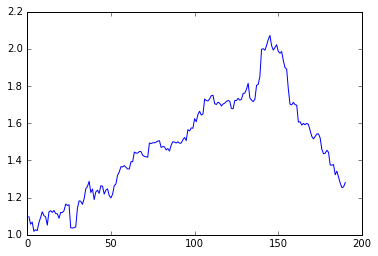

In [54]:
plt.plot(beta)

In [177]:
port_returns = portfolio_to_series(po).diff()

In [180]:
spy_returns = spy_2007.sort_index().diff()

In [185]:
betas = get_beta(port_returns, spy_returns)[1]

In [188]:
sys.path.append('/Users/christianjunge/OneDrive/AC297Capstone/AC297_beta/source/')

In [189]:
import JungeUtilities

In [60]:
import beta_hedging

In [207]:
len(betas)

191

In [56]:
len(po)

251

In [208]:
import numpy as np

In [64]:
reload(beta_hedging)

<module 'beta_hedging' from 'beta_hedging.py'>

In [66]:
hedged_returns = beta_hedging.beta_hedging(pd.Series(beta, index=spy_2006[60:].index), spy_2006[60:], po[60:])

In [68]:
hedged_returns

,0
Date,
20060331,NaN
20060403,0.018253
20060404,-0.048802
20060405,0.008310
20060406,0.002967
20060407,-0.023815
20060410,-0.011200
20060411,-0.106441
20060412,-0.007514


In [202]:
port_returns.index

Int64Index([20070103, 20070104, 20070105, 20070108, 20070109, 20070110,
            20070111, 20070112, 20070116, 20070117,
            ...
            20071217, 20071218, 20071219, 20071220, 20071221, 20071224,
            20071226, 20071227, 20071228, 20071231],
           dtype='int64', name=u'Date', length=251)

In [154]:
stvalue =10000000

In [158]:
wts = np.array([0.1, 0.05, 0.05, 0.2, 0.1, 0.01, 0.19, 0.05, 0.15, 0.1])

In [160]:
ns = stvalue*wts/portfolio_2007.iloc[0,:]

In [164]:
ba = portfolio_2007.apply(lambda x: x*ns, axis=1)

In [165]:
np.sum(ba.iloc[0,:])

10000000.0

In [157]:
portfolio_2007.iloc[0,:]

QCOM      31.464337
SIGM      25.520000
XRA        1.409090
GOOG     233.561839
ROVI      27.959999
OXGN    1152.921624
DSX       12.123565
CNC       12.315000
MLAB      16.696466
CTBI      25.913110
Name: 20070103, dtype: float64